Regression Training and Testing - Practical Machine Learning Tutorial with Python p.6
========

Original video on Sentdex's Youtube Channel: https://www.youtube.com/watch?v=za5s7RB_VLw

Support his awesome content: https://www.pythonprogramming.net/


In [7]:
import pandas as pd
import quandl
import math 
import numpy as np
from sklearn import preprocessing, model_selection, svm 
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

#New imports for this lesson: 
import pickle

Code from last time, plus some edits he makes right away. Follow along in the video, and I'll update to the final code.

Note: You'll start to get errors like this, if you run your script a lot during one day: 

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

To get around this, you can sign up for a free Quandl account, and then put in your API key. The next line is optional, but if you do have a key use it below:


In [20]:
#quandl.ApiConfig.api_key = "YOURAPIKEY"

In [10]:
df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

What we worked on last time: 

In [11]:
X = np.array(df.drop(['label'],1))

X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs = 0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
#print(accuracy)

Here's where we start into the process of 'pickling'. In this line, we dump our classifier 'clf' into the file 'f', so we can load it at another time. 

In [12]:
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

And then we load it right back in...

In [13]:
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

Start making our predictions. Note that he initially types "confidence" instead of "accuracy"

In [14]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1074.96690668 1089.61579998 1103.54113973 1098.15861752 1091.68070496
 1089.05491561 1087.48238724 1084.45540897 1078.27270449 1073.91025512
 1071.62525064 1091.08770481 1109.44234521 1113.90395599 1128.80331993
 1132.79512451 1131.44664311 1128.96801668 1130.75228001 1149.11852645
 1148.1989501  1158.31233609 1154.8729032  1162.65440027 1182.88272488
 1195.25453636 1189.48991997 1201.46779673 1207.04123563 1205.04110788
 1195.82639107 1201.4171686  1200.06333551 1135.8130457  1082.58209359] 0.9792011199569505 35


Let's plot the data to see what it looks like. Note that I put the style declaration here instead of at the top. 

In [15]:
style.use('ggplot')

We fill the Forecast column initially with the NaN from numpy.

In [16]:
df['Forecast'] = np.nan

We find out what the last date was, and then find the next day. 

In [17]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

For loop to go through each element of the forecast set. Iterating through the forecast set, taking each forecast and day, and setting those as the values in the dataframe, making the future features NaN. He goes through this pretty quickly, so you might need to look it over. 

In [18]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

Plotting the data. We add the 'Adj. Close'and the 'Forecast' series to the plot. Set up the legends, and then show. 

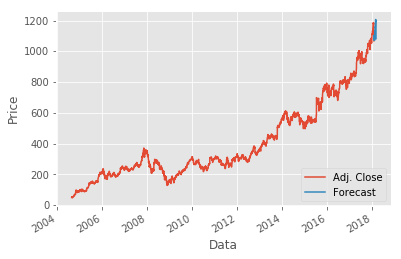

In [19]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()

He talks for a few minutes at the end of the video about the for loop above. 

That's it for this lesson!
----
On to the next video: https://www.youtube.com/watch?v=V59bYfIomVk